# load module

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# expression level distribution (by trans)

In [34]:
import glob
os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/diff_byTrans')
# os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/diff')
diffFiles = glob.glob('*.diff')
rpkm_df_dict = {}
for file in diffFiles :
    gene = file.split('_')[2]
    stage = file.split('_')[3]
    rpkm_df_dict[f'{gene}_{stage}'] = pd.read_csv(file, usecols = [0,1,6], comment = '#', names = ['transcript_id', 'gene_id', 'RPKM'], sep = "\t")
    rpkm_df_dict[f'{gene}_{stage}']['RPKM_log10'] = np.log10(rpkm_df_dict[f'{gene}_{stage}']['RPKM']+1)
    
rpkm_df_dict[f'{gene}_{stage}']

,transcript_id,gene_id,RPKM,RPKM_log10
0,ENSDART00000000004.5,ENSDARG00000000001.6,3.914620,0.691490
1,ENSDART00000000005.7,ENSDARG00000000002.8,0.535435,0.186231
2,ENSDART00000000042.11,ENSDARG00000033231.9,59.267500,1.780083
3,ENSDART00000000069.8,ENSDARG00000000068.9,17.419800,1.265285
4,ENSDART00000000070.7,ENSDARG00000000069.7,101.003000,2.008613
...,...,...,...,...
65835,ENSDART00000194999.1,ENSDARG00000117268.1,0.000000,0.000000
65836,ENSDART00000195000.1,ENSDARG00000117772.1,0.000000,0.000000
65837,ENSDART00000195001.1,ENSDARG00000117642.1,0.000000,0.000000
65838,ENSDART00000195002.1,ENSDARG00000117340.1,0.000000,0.000000


In [37]:
import glob
os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/diff_byTrans')
# os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/diff')
diffFiles = glob.glob('WT_VS_mcm6l_*_ensGene.diff')
for file in diffFiles :
    gene = 'wt'
    stage = file.split('_')[3]
    rpkm_df_dict[f'{gene}_{stage}'] = pd.read_csv(file, usecols = [0,1,5], comment = '#', names = ['transcript_id', 'gene_id', 'RPKM'], sep = "\t")
    rpkm_df_dict[f'{gene}_{stage}']['RPKM_log10'] = np.log10(rpkm_df_dict[f'{gene}_{stage}']['RPKM']+1)
    
rpkm_df_dict[f'{gene}_{stage}']

,transcript_id,gene_id,RPKM,RPKM_log10
0,ENSDART00000000004.5,ENSDARG00000000001.6,3.738260,0.675619
1,ENSDART00000000005.7,ENSDARG00000000002.8,0.965183,0.293403
2,ENSDART00000000042.11,ENSDARG00000033231.9,188.266000,2.277073
3,ENSDART00000000069.8,ENSDARG00000000068.9,14.234500,1.182828
4,ENSDART00000000070.7,ENSDARG00000000069.7,123.883000,2.096503
...,...,...,...,...
65835,ENSDART00000194999.1,ENSDARG00000117268.1,0.000000,0.000000
65836,ENSDART00000195000.1,ENSDARG00000117772.1,0.000000,0.000000
65837,ENSDART00000195001.1,ENSDARG00000117642.1,0.000000,0.000000
65838,ENSDART00000195002.1,ENSDARG00000117340.1,0.000000,0.000000


In [38]:
sorted(rpkm_df_dict.keys())

['mcm3l_1k',
 'mcm6l_1k',
 'mcm6l_256',
 'mcm6l_64',
 'mcm6l_6hpf',
 'mcm6l_oblong',
 'mcm6l_oocyte',
 'npm2a_1k',
 'npm2a_256',
 'npm2a_64',
 'npm2a_oblong',
 'npm2a_oocyte',
 'orc1_1k',
 'orc1_oocyte',
 'wt_1k',
 'wt_256',
 'wt_64',
 'wt_6hpf',
 'wt_oblong',
 'wt_oocyte']

Skip mcm3l_oocyte
Skip mcm3l_64
Skip mcm3l_256
Skip mcm3l_oblong
Skip orc1_64
Skip orc1_256
Skip orc1_oblong


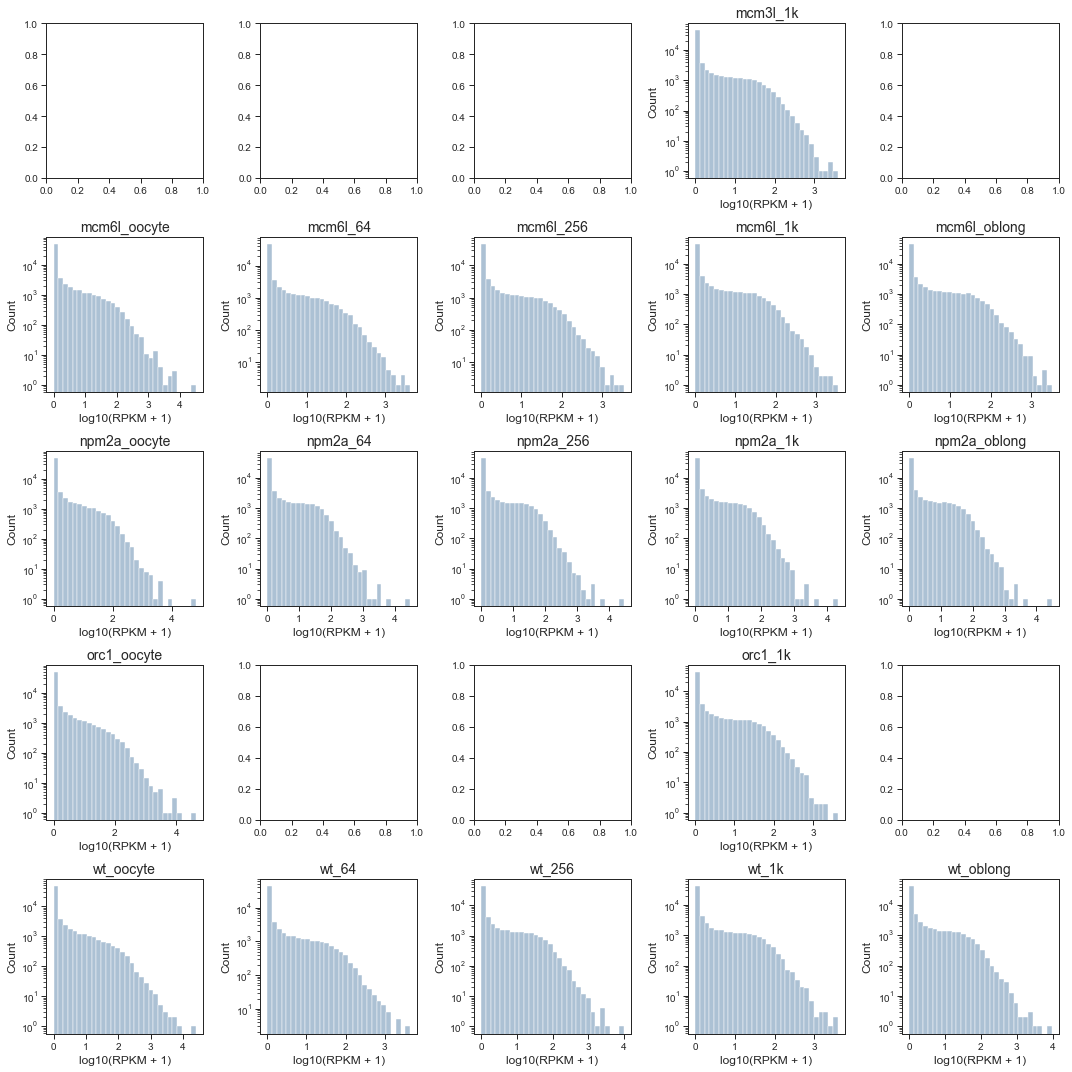

In [40]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(5,5,figsize = (15,15), tight_layout = True)

    for i,gene in enumerate(['mcm3l', 'mcm6l', 'npm2a', 'orc1', 'wt']) :
        for j,stage in enumerate(['oocyte', '64', '256', '1k', 'oblong']) :
            ax = axes[i,j]
            k = f'{gene}_{stage}'
            if k in rpkm_df_dict.keys() :
                h = sns.histplot(data = rpkm_df_dict[k], 
                             x = 'RPKM_log10', 
                             ax = ax, 
                             bins = 30, #[x/10 for x in range(35, 205, 10)],
                             color = '#90ADC6')
                ax.set_yscale('log')
                ax.set_title(k)
                ax.set_xlabel('log10(RPKM + 1)')
                
            else :
                print(f'Skip {gene}_{stage}')
            
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/figures/make3_histplot_geneExpr_byTrans.pdf',
                transparent=True)